# data preprocessing (data cleaning dan rename)

In [5]:
import pandas as pd

In [6]:
# Load dataset
data = pd.read_csv('../data/Sleep_health_and_lifestyle_dataset.csv')

In [7]:
data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [8]:
# melihat tipa data setiap kolom
data.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

untuk menghindari bias dalam analisis dan menhindari performa data turun

In [42]:
# Memeriksa nilai kosong
missing_values = data.isnull().sum()
print(missing_values)

Gender                     0
Age                        0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic                   0
Diastolic                  0
dtype: int64


memastikan datanya tetap lengkap untuk digunakan dalam analisis selanjutnya

In [10]:
# Mengisi baris yang mengandung nilai kosong
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('Healthy Sleep')
data['Sleep Disorder'].value_counts()

Sleep Disorder
Healthy Sleep    219
Sleep Apnea       78
Insomnia          77
Name: count, dtype: int64

untuk menghindari overfitting (model bekerja dengan baik pada data pelatihan tetapi gagal generalisasi pada data baru)

In [11]:
# Memeriksa data yang duplikat
print('Data Duplikat : ', data.duplicated().sum())

Data Duplikat :  0


untuk dapat menganalisis yang lebih terperinci terhadap data tekanan darah.

In [12]:
# Memisahkan kolom 'Blood Pressure' menjadi dua kolom 'Systolic' dan 'Diastolic'
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)
data['Systolic'] = data['Systolic'].astype(float)
data['Diastolic'] = data['Diastolic'].astype(float)

data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Healthy Sleep,126.0,83.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Healthy Sleep,125.0,80.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Healthy Sleep,125.0,80.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140.0,90.0


In [13]:
# melihat statistik sleep disorder berdasarkan masing-masing kolom
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920,128.553476,84.649733
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679,7.748118,6.161611
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000,115.000000,75.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000,125.000000,80.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000,130.000000,85.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,135.000000,90.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000,142.000000,95.000000


mengurangi kompleksitas data dan memfokuskan analisis pada fitur-fitur yang diperlukan

In [14]:
# Menghapus kolom yang tidak diperlukan
data = data.copy()
data = data.drop(['Person ID', 'Blood Pressure', 'Occupation'], axis=1)
data.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,6.1,6,42,6,Overweight,77,4200,Healthy Sleep,126.0,83.0
1,Male,28,6.2,6,60,8,Normal,75,10000,Healthy Sleep,125.0,80.0
2,Male,28,6.2,6,60,8,Normal,75,10000,Healthy Sleep,125.0,80.0
3,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0
4,Male,28,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140.0,90.0


# data visualization

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

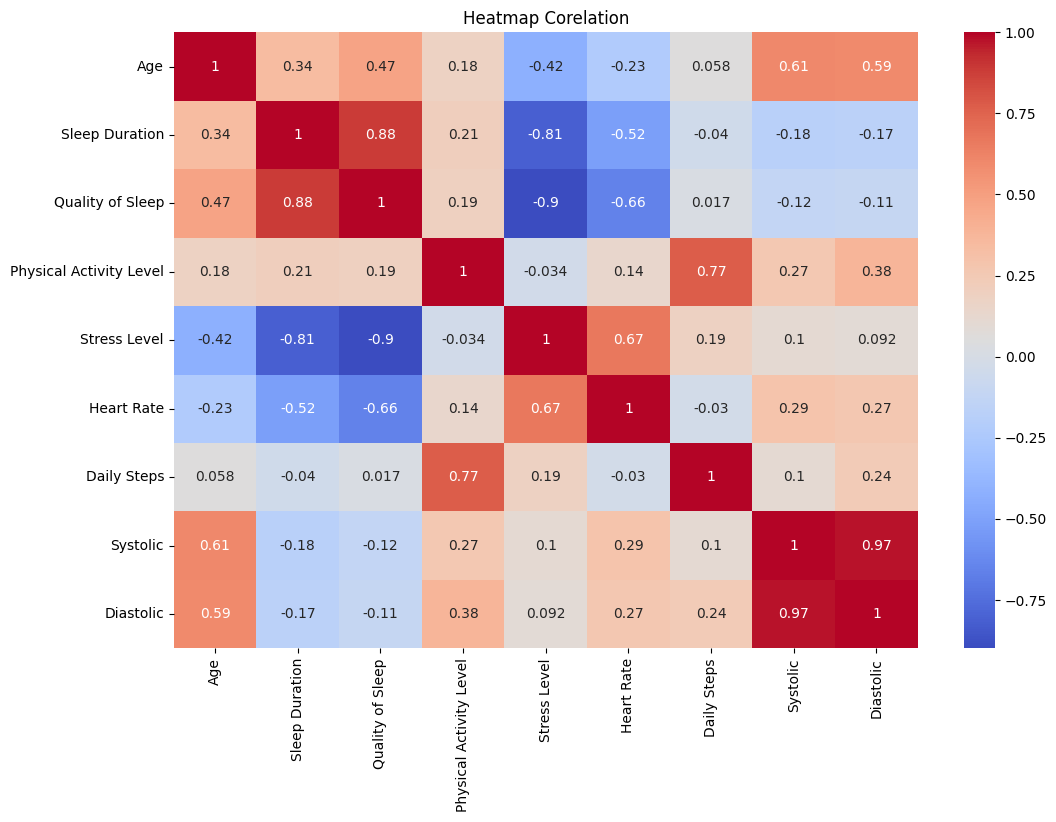

In [16]:
# Memeriksa korelasi antara fitur numerik menggunakan heatmap
num_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Corelation')
plt.show()

In [17]:
# Membuat histogram distribusi 'Sleep Disorder'
fig = px.histogram(data, x='Sleep Disorder', title='Distribution of Sleep Disorder',
                   labels={'Sleep Disorder': 'Sleep Disorder'},
                   color='Sleep Disorder')
fig.show()

In [18]:
# Membuat diagram batang distribusi 'Sleep Disorder' berdasarkan 'Gender'
fig = px.bar(data, x='Sleep Disorder', color='Gender',
             title='Gender-wise Sleep Disorder Distribution',
             labels={'Sleep Disorder': 'Sleep Disorder', 'Gender': 'Gender', 'count': 'Count'})
fig.update_layout(
    bargap=0.2,
    barnorm='percent',
)
fig.show()

In [19]:
# Membuat histogram distribusi 'Age' berdasarkan 'Sleep Disorder'
fig = px.histogram(data, x='Age', color='Sleep Disorder',
                   title='Age Distribution with Sleep Disorder',
                   labels={'Age': 'Age', 'count': 'Count'})
fig.update_layout(
    bargap=0.2
)
fig.show()

In [20]:
# Membuat scatter plot antara 'Sleep Duration' dan 'Quality of Sleep' berdasarkan 'Sleep Disorder'
fig = px.scatter(data, x='Sleep Duration', y='Quality of Sleep', color='Sleep Disorder',
                 title='Sleep Duration vs. Quality of Sleep',
                 labels={'Sleep Duration': 'Sleep Duration', 'Quality of Sleep': 'Quality of Sleep'})
fig.show()

In [21]:
# Membuat scatter plot antara 'Physical Activity Level' dan 'Stress Level' berdasarkan 'Sleep Disorder'
fig = px.scatter(data, x='Physical Activity Level', y='Stress Level', color='Sleep Disorder',
                 title='Stress Level vs. Physical Activity Level',
                 labels={'Physical Activity Level': 'Physical Activity Level', 'Stress Level': 'Stress Level'})
fig.show()

In [22]:
# Membuat histogram distribusi 'Heart Rate' berdasarkan 'Sleep Disorder'
fig = px.histogram(data, x='Heart Rate', color='Sleep Disorder',
                   title='Heart Rate Distribution by Sleep Disorder',
                   labels={'Heart Rate': 'Heart Rate', 'count': 'Count'})
fig.show()

In [23]:
# Membuat histogram distribusi 'Daily Steps' berdasarkan 'Sleep Disorder'
fig = px.histogram(data, x='Daily Steps', color='Sleep Disorder',
                   title='Daily Steps Distribution by Sleep Disorder',
                   labels={'Daily Steps': 'Daily Steps', 'count': 'Count'})
fig.show()

In [24]:
# Membuat scatter plot antara 'Systolic' dan 'Diastolic' berdasarkan 'Sleep Disorder'
fig = px.scatter(data, x='Systolic', y='Diastolic', color='Sleep Disorder',
                 title='Systolic and Diastolic Blood Pressure Distribution by Sleep Disorder',
                 labels={'SYSTOLIC': 'Systolic Blood Pressure', 'DIASTOLIC': 'Diastolic Blood Pressure'})
fig.show()

In [25]:
# Membuat histogram distribusi 'BMI Category' berdasarkan 'Sleep Disorder'
fig = px.histogram(data, x='BMI Category', color='Sleep Disorder',
                   title='BMI Category Distribution by Sleep Disorder',
                   labels={'BMI Category': 'BMI Category', 'count': 'Count'})
fig.show()

# data preprocessing (label encoding, rename, dan handling imbalanced data)

In [26]:
from sklearn.preprocessing import LabelEncoder
import joblib
from imblearn.over_sampling import SMOTE

model yang akan digunakan hanya dapat mengolah data numerik

In [27]:
# Inisialisasi label encoder untuk kolom kategorikal
label_encoders = {}
cat_columns = ['BMI Category', 'Sleep Disorder', 'Gender']
for col in cat_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,27,6.1,6,42,6,3,77,4200,0,126.0,83.0
1,1,28,6.2,6,60,8,0,75,10000,0,125.0,80.0
2,1,28,6.2,6,60,8,0,75,10000,0,125.0,80.0
3,1,28,5.9,4,30,8,2,85,3000,2,140.0,90.0
4,1,28,5.9,4,30,8,2,85,3000,2,140.0,90.0


In [28]:
# Simpan label encoder untuk 'Sleep Disorder'
joblib.dump(label_encoders['Sleep Disorder'], 'sleep_disorder_label_encoder.pkl')

['sleep_disorder_label_encoder.pkl']

pada dasarnya normal weight sama normal sama saja berdasarkan data visualization

In [29]:
# Mengganti nilai 'Normal Weight' menjadi 'Normal' pada kolom 'BMI Category'
data['BMI Category'] = data['BMI Category'].replace("Normal Weight", "Normal")
data['BMI Category'].value_counts()

BMI Category
0    195
3    148
1     21
2     10
Name: count, dtype: int64

In [30]:
# Memisahkan fitur dan label
X = data.drop('Sleep Disorder', axis=1)
y = data['Sleep Disorder']

mengatasi masalah ketidakseimbangan kelas di dataset

In [31]:
# Terapkan SMOTE untuk menangani ketidakseimbangan kelas
smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# modeling

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

untuk melatih model (train) dan mengevaluasi kinerja model (test)

In [33]:
# Bagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [34]:
# memeriksa akurasi jika menggunakan DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

model_dtc = DecisionTreeClassifier(class_weight='balanced')
model_dtc.fit(X_train, y_train)

y_pred = model_dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9015151515151515
Precision: 0.9005706761209904
Recall: 0.9015151515151515
F1-score: 0.9007458426147746


In [35]:
# Memeriksa akurasi RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9242424242424242
Precision: 0.9266738956294082
Recall: 0.9242424242424242
F1-score: 0.9245076052683937


In [36]:
# Evaluasi pentingnya fitur
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan tabel pentingnya fitur
print(importance_df)

                    Feature  Importance
9                  Systolic    0.219984
10                Diastolic    0.200509
6              BMI Category    0.122094
4   Physical Activity Level    0.103911
8               Daily Steps    0.098108
2            Sleep Duration    0.080168
1                       Age    0.069867
7                Heart Rate    0.041973
3          Quality of Sleep    0.032866
5              Stress Level    0.017914
0                    Gender    0.012605


memahami seberapa baik model dapat mengklasifikasikan atau memprediksi data dengan benar.

In [37]:
# Simpan model ke file
joblib.dump(model, 'sleep_disorder_model.pkl')

['sleep_disorder_model.pkl']

# prediction on new data

In [38]:
# Load model dan label encoder
model = joblib.load('sleep_disorder_model.pkl')
sleep_disorder_label_encoder = joblib.load('sleep_disorder_label_encoder.pkl')

In [39]:
# Contoh data baru untuk prediksi
new_data = pd.DataFrame({
    'Gender': [1],
    'Age': [25],
    'Sleep Duration': [0],
    'Quality of Sleep': [0],
    'Physical Activity Level': [0],
    'Stress Level': [4],
    'BMI Category': [0],
    'Heart Rate': [50],
    'Daily Steps': [10],
    'Systolic': [50],
    'Diastolic': [30]
})

In [40]:
# Prediksi gangguan tidur
prediction = model.predict(new_data)
predicted_label = sleep_disorder_label_encoder.inverse_transform(prediction)
print("Predicted Sleep Disorder:", predicted_label[0])

Predicted Sleep Disorder: Healthy Sleep


In [41]:
# Load the trained model
model = joblib.load('sleep_disorder_model.pkl')

# Print feature names
print(model.feature_names_in_)


['Gender' 'Age' 'Sleep Duration' 'Quality of Sleep'
 'Physical Activity Level' 'Stress Level' 'BMI Category' 'Heart Rate'
 'Daily Steps' 'Systolic' 'Diastolic']
